In [5]:
# Paso 1: Imports necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración para reproducibilidad
np.random.seed(42)


In [6]:
# Definir nombres de sectores
sectors = ['Agriculture', 'Manufacturing', 'Construction', 'Services', 'Transport']

# Simular matriz de coeficientes técnicos A (valores entre 0 y 0.5)
A = np.random.uniform(0, 0.5, size=(5, 5))

# Convertir en DataFrame para visualización
A_df = pd.DataFrame(A, index=sectors, columns=sectors)
print("🔹 Matriz de coeficientes técnicos A:")
display(A_df)


🔹 Matriz de coeficientes técnicos A:


,Agriculture,Manufacturing,Construction,Services,Transport
Agriculture,0.187270,0.475357,0.365997,0.299329,0.078009
Manufacturing,0.077997,0.029042,0.433088,0.300558,0.354036
Construction,0.010292,0.484955,0.416221,0.106170,0.090912
Services,0.091702,0.152121,0.262378,0.215973,0.145615
Transport,0.305926,0.069747,0.146072,0.183181,0.228035


In [7]:
# Simular demanda final d (valores entre 100 y 500)
d = np.random.uniform(100, 500, size=(5, 1))
d_df = pd.DataFrame(d, index=sectors, columns=['Final Demand'])

print("🔹 Demanda final d:")
display(d_df)


🔹 Demanda final d:


,Final Demand
Agriculture,414.070385
Manufacturing,179.869513
Construction,305.693775
Services,336.965828
Transport,118.580165


In [8]:
# Calcular (I - A)^-1
I = np.identity(len(sectors))
Leontief_inverse = np.linalg.inv(I - A)
Leontief_inverse_df = pd.DataFrame(Leontief_inverse, index=sectors, columns=sectors)

print("🔹 Inversa de Leontief (I - A)^-1:")
display(Leontief_inverse_df)


🔹 Inversa de Leontief (I - A)^-1:


,Agriculture,Manufacturing,Construction,Services,Transport
Agriculture,-0.718429,-3.807303,-5.476537,-3.191698,-3.065697
Manufacturing,-1.382582,-2.328782,-4.268414,-2.508786,-2.183642
Construction,-1.493480,-2.876089,-3.129461,-2.642522,-2.336948
Services,-1.025860,-2.385149,-3.243666,-0.877500,-1.745057
Transport,-0.935653,-2.829417,-3.917835,-2.199770,-0.973107


In [10]:
# Paso 5: Calcular producción total x
x = Leontief_inverse @ d
x_df = pd.DataFrame(x, index=sectors, columns=['Total Output'])

print("🔹 Producción total requerida x para satisfacer d:")
display(x_df)


🔹 Producción total requerida x para satisfacer d:


,Total Output
Agriculture,-4095.465275
Manufacturing,-3400.502230
Construction,-3259.938756
Services,-2347.979031
Transport,-2950.648461


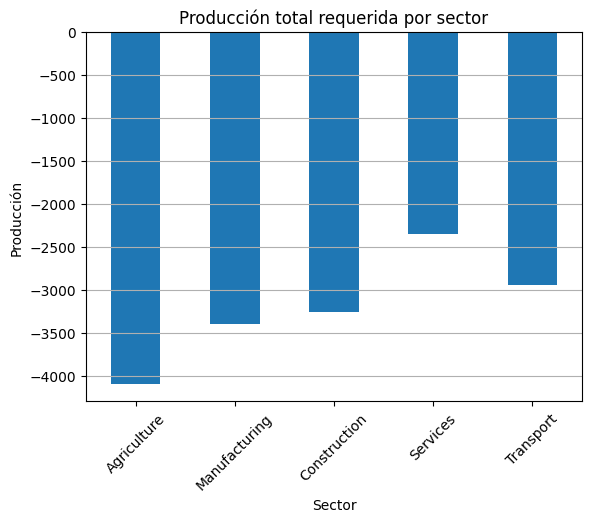

In [11]:
# Visualización en gráfico de barras
x_df.plot(kind='bar', legend=False)
plt.title("Producción total requerida por sector")
plt.ylabel("Producción")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


🔹 Multiplicadores sectoriales (ordenados de mayor a menor):


,Production Multiplier
Agriculture,-5.556004
Transport,-10.304451
Services,-11.420277
Manufacturing,-14.226740
Construction,-20.035913


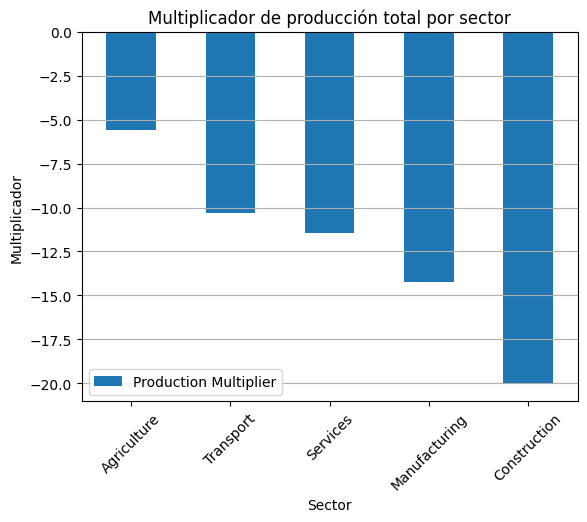

In [12]:
# 🔹 Multiplicador de producción sectorial:
# Interpretación: cuánto aumenta la producción total si la demanda final de ese sector aumenta en 1 unidad

# Sumamos por filas de la inversa de Leontief
multipliers = Leontief_inverse.sum(axis=0)

# Lo mostramos como DataFrame ordenado
multipliers_df = pd.DataFrame(multipliers, index=sectors, columns=['Production Multiplier']).sort_values(by='Production Multiplier', ascending=False)

print("🔹 Multiplicadores sectoriales (ordenados de mayor a menor):")
display(multipliers_df)

# Visualización en gráfico de barras
multipliers_df.plot(kind='bar')
plt.title("Multiplicador de producción total por sector")
plt.ylabel("Multiplicador")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


In [13]:
# 🔹 Copia de la demanda final original para no perderla
d_base = d.copy()

# 🔹 Selección de sector "Construction" y aumento del 10%
sector_shock = 'Construction'
shock_percentage = 0.10  # 10%

# Identificar posición (índice) del sector
sector_index = sectors.index(sector_shock)

# Aplicar el shock
d_shock = d.copy()
d_shock[sector_index, 0] *= (1 + shock_percentage)

# Mostrar demanda antes y después
print("🔹 Demanda original:")
display(pd.DataFrame(d_base, index=sectors, columns=['Final Demand']))

print(f"🔹 Demanda con shock (+10% en {sector_shock}):")
display(pd.DataFrame(d_shock, index=sectors, columns=['Final Demand']))


🔹 Demanda original:


,Final Demand
Agriculture,414.070385
Manufacturing,179.869513
Construction,305.693775
Services,336.965828
Transport,118.580165


🔹 Demanda con shock (+10% en Construction):


,Final Demand
Agriculture,414.070385
Manufacturing,179.869513
Construction,336.263153
Services,336.965828
Transport,118.580165


In [16]:
# Producción antes del shock
x_base = Leontief_inverse @ d_base

# Producción después del shock
x_shock = Leontief_inverse @ d_shock

# Construir DataFrame comparison_df de forma robusta
comparison_df = pd.DataFrame({
    'Total Output Base': x_base.flatten(),
    'Total Output Shock': x_shock.flatten(),
    'Change': (x_shock - x_base).flatten()
}, index=sectors)

print("🔹 Comparación de producción total antes y después del shock:")
display(comparison_df)


🔹 Comparación de producción total antes y después del shock:


,Total Output Base,Total Output Shock,Change
Agriculture,-4095.465275,-4262.879614,-167.414339
Manufacturing,-3400.502230,-3530.984977,-130.482747
Construction,-3259.938756,-3355.604438,-95.665682
Services,-2347.979031,-2447.135871,-99.156840
Transport,-2950.648461,-3070.414246,-119.765785


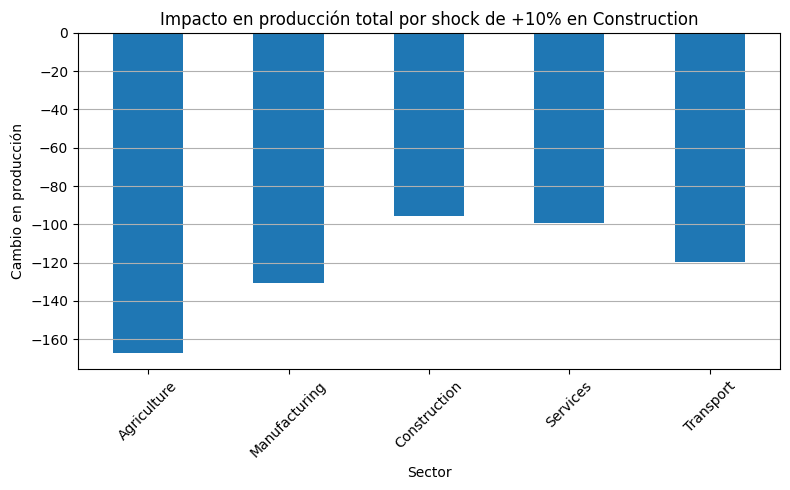

In [17]:
# Visualización: Impacto en producción total como resultado del shock
comparison_df['Change'].plot(kind='bar', figsize=(8,5))
plt.title(f"Impacto en producción total por shock de +10% en {sector_shock}")
plt.ylabel("Cambio en producción")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
